In [4]:
import os
import tarfile
import urllib.request

RES_PATH = os.path.join("res_datasets","resourceing")

def fetch_resource_data(res_path=RES_PATH):
    if not os.path.isdir(res_path):
        os.makedirs(res_path)
##创建文件夹路径函数
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
fetch_resource_data() ##调用创建

##读取CSV文件
import pandas as pd

def load_res_data(res_path = RES_PATH,file_name="lable.csv"):
    csv_path = os.path.join(RES_PATH,file_name)
    return pd.read_csv(csv_path) 





In [32]:
##数据处理
resource_origin_data = load_res_data()  #get origin csv data

#%matplotlib inline
#import matplotlib.pyplot as plt
#resource_origin_data.hist(bins=50, figsize=(20,15))
#plt.show() #data plot show

resource_origin_data_lut = resource_origin_data.dropna(subset = ["LUT"])
resource_origin_data_lut=resource_origin_data_lut.drop("FF",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("BUFG",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("IO",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleName",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("PARAMETERVALUE",axis=1)
resource_origin_data_lut=resource_origin_data_lut.drop("ModuleInsts",axis=1)

In [33]:
#数据信息
resource_origin_data_lut.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 60 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   ARITLSHIFT                 212 non-null    int64
 1   ARITLSHIFT_PORT_NUM        212 non-null    int64
 2   ARITLSHIFT_PORT_WIDTH      212 non-null    int64
 3   ARITLSHIFT_VALUE           212 non-null    int64
 4   ARITRSHIFT                 212 non-null    int64
 5   ARITRSHIFT_PORT_NUM        212 non-null    int64
 6   ARITRSHIFT_PORT_WIDTH      212 non-null    int64
 7   ARITRSHIFT_VALUE           212 non-null    int64
 8   AlwaysConstructs           212 non-null    int64
 9   AssignLHSPortNum           212 non-null    int64
 10  AssignLHSWidth             212 non-null    int64
 11  AssignRHSPortNum           212 non-null    int64
 12  AssignRHSWidth             212 non-null    int64
 13  AssignStmts                212 non-null    int64
 14  BLOCKINGASSIGN            

In [34]:
resource_origin_data_lut.describe()

,ARITLSHIFT,ARITLSHIFT_PORT_NUM,ARITLSHIFT_PORT_WIDTH,ARITLSHIFT_VALUE,ARITRSHIFT,ARITRSHIFT_PORT_NUM,ARITRSHIFT_PORT_WIDTH,ARITRSHIFT_VALUE,AlwaysConstructs,AssignLHSPortNum,...,QUESTIONCOLONTHEN,REDAND,REDAOR,REDXOR,REG,REGWIDTH,UnaryOperator,WIRENUM,WIREWIDTH,LUT
count,212.0,212.0,212.0,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,0.0,0.0,0.0,0.0,0.113208,0.070755,0.674528,0.386792,2.287736,2.924528,...,0.523585,3.886792,0.495283,0.561321,3.783019,124.339623,0.250000,2.844340,13.976415,32.731132
std,0.0,0.0,0.0,0.0,0.758156,0.524014,4.576129,2.801728,3.237406,10.205192,...,2.526525,8.233927,4.434353,4.076405,5.397041,705.919378,2.236863,8.446055,52.403144,85.157887
min,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.750000,0.000000,0.000000,0.000000,1.000000
50%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.500000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,0.000000,8.000000
75%,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,...,0.000000,4.000000,0.000000,0.000000,4.000000,31.000000,0.000000,1.250000,2.000000,35.250000
max,0.0,0.0,0.0,0.0,8.000000,7.000000,56.000000,28.000000,24.000000,127.000000,...,31.000000,55.000000,62.000000,56.000000,32.000000,8202.000000,32.000000,65.000000,575.000000,948.000000


In [35]:
#相关性分析
corr_matrix=resource_origin_data_lut.corr()
corr_matrix["LUT"].sort_values(ascending=False)

LUT                          1.000000
CONDITIONALELSE              0.431417
NonBlockLeftWidth            0.417203
PLUS                         0.399622
NonBlockingAssign            0.393835
CONDITIONALTHEN              0.392870
CONDITIONALIF                0.392870
NonBlockingLeftPortNum       0.387136
REG                          0.318705
AlwaysConstructs             0.276555
CONDITIONALIFWIDTH           0.266208
REDAND                       0.251582
MIN                          0.232235
CASEITEMNUM                  0.232026
NonBlockRightWidth           0.229791
CASECONDITIONNUM             0.214073
OUTPUTWIDTH                  0.211457
AssignLHSWidth               0.201654
INPUTWIDTH                   0.192558
CASECONDITIONWIDTH           0.189411
AssignRHSWidth               0.180115
NonBlockingRightPortNum      0.179107
BlockAssign_Left_Width       0.143185
ARITRSHIFT_PORT_NUM          0.139558
WIREWIDTH                    0.136321
BLOCKINGASSIGN               0.133238
INPUT       

In [36]:
#特征优化
resource_lut = resource_origin_data_lut["LUT"].copy() #label data
resource_lut_data = resource_origin_data_lut.drop("LUT",axis=1) #feature data
resource_label = list(resource_lut_data) #labal list


In [37]:
#数据分割
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
#训练集、测试集、验证集
X_train_full, X_test, y_train_full, y_test = train_test_split(resource_lut_data, resource_lut, test_size=0.2,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [38]:
#数据标准化
scaler = MinMaxScaler() 
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)
X_train_full = scaler.transform(X_train_full)
X_data_full = scaler.transform(resource_lut_data)

In [39]:
#深度学习

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [40]:
X_train.shape

(126, 59)

In [220]:
keras.backend.clear_session()
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(59, activation="relu")(input_)
#hidden2 = keras.layers.Dense(150, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden1])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss',patience=200)

In [231]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(1)
])

In [174]:
keras.backend.clear_session()
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(59, activation="relu"),
    keras.layers.Dense(96, activation="relu"),
    keras.layers.Dense(110, activation="relu"),
    keras.layers.Dense(58, activation="relu"),
    keras.layers.Dense(1)
])

In [232]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=0.001))
history = model.fit(X_train_full, y_train_full, epochs=200, validation_data=(X_valid, y_valid))
# 绘制训练 & 验证的损失值


Epoch 1/200
6/6 [==============================] - 0s 22ms/step - loss: 8147.1079 - val_loss: 23245.6172
Epoch 2/200
6/6 [==============================] - 0s 11ms/step - loss: 8024.3979 - val_loss: 22949.9004
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 7777.0010 - val_loss: 22388.9238
Epoch 4/200
6/6 [==============================] - 0s 12ms/step - loss: 7356.9570 - val_loss: 21521.4980
Epoch 5/200
6/6 [==============================] - 0s 14ms/step - loss: 6825.9971 - val_loss: 20483.7520
Epoch 6/200
6/6 [==============================] - 0s 12ms/step - loss: 6352.9082 - val_loss: 19706.6016
Epoch 7/200
6/6 [==============================] - 0s 11ms/step - loss: 6162.9385 - val_loss: 19324.4004
Epoch 8/200
6/6 [==============================] - 0s 7ms/step - loss: 6016.5322 - val_loss: 19032.6367
Epoch 9/200
6/6 [==============================] - 0s 9ms/step - loss: 5888.8325 - val_loss: 18850.5312
Epoch 10/200
6/6 [==============================] - 0s 7m

6/6 [==============================] - 0s 6ms/step - loss: 4456.5649 - val_loss: 15218.2568
Epoch 80/200
6/6 [==============================] - 0s 5ms/step - loss: 4474.1685 - val_loss: 15349.4141
Epoch 81/200
6/6 [==============================] - 0s 5ms/step - loss: 4449.9351 - val_loss: 15509.1514
Epoch 82/200
6/6 [==============================] - 0s 5ms/step - loss: 4469.0234 - val_loss: 14833.1260
Epoch 83/200
6/6 [==============================] - 0s 5ms/step - loss: 4423.6348 - val_loss: 15924.5000
Epoch 84/200
6/6 [==============================] - 0s 5ms/step - loss: 4482.0547 - val_loss: 15432.0713
Epoch 85/200
6/6 [==============================] - 0s 6ms/step - loss: 4404.8472 - val_loss: 15500.8994
Epoch 86/200
6/6 [==============================] - 0s 5ms/step - loss: 4398.1675 - val_loss: 15541.1221
Epoch 87/200
6/6 [==============================] - 0s 5ms/step - loss: 4330.0771 - val_loss: 14637.4492
Epoch 88/200
6/6 [==============================] - 0s 6ms/step - lo

Epoch 157/200
6/6 [==============================] - 0s 6ms/step - loss: 2260.9080 - val_loss: 7519.6963
Epoch 158/200
6/6 [==============================] - 0s 7ms/step - loss: 2688.6406 - val_loss: 7898.3755
Epoch 159/200
6/6 [==============================] - 0s 7ms/step - loss: 2336.9697 - val_loss: 8292.7148
Epoch 160/200
6/6 [==============================] - 0s 5ms/step - loss: 2556.2046 - val_loss: 7576.1323
Epoch 161/200
6/6 [==============================] - 0s 7ms/step - loss: 2425.8369 - val_loss: 6953.5874
Epoch 162/200
6/6 [==============================] - 0s 7ms/step - loss: 2189.6123 - val_loss: 5424.1875
Epoch 163/200
6/6 [==============================] - 0s 7ms/step - loss: 2347.9368 - val_loss: 6174.9409
Epoch 164/200
6/6 [==============================] - 0s 6ms/step - loss: 2064.4290 - val_loss: 6498.8540
Epoch 165/200
6/6 [==============================] - 0s 5ms/step - loss: 2154.6338 - val_loss: 6671.5356
Epoch 166/200
6/6 [==============================] - 0s

In [177]:

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [175]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 59)                3540      
                                                                 
 dense_1 (Dense)             (None, 96)                5760      
                                                                 
 dense_2 (Dense)             (None, 110)               10670     
                                                                 
 dense_3 (Dense)             (None, 58)                6438      
                                                                 
 dense_4 (Dense)             (None, 1)                 59        
                                                                 
Total params: 26,467
Trainable params: 26,467
Non-trainable params: 0
_________________________________________________________________


30.288089196381616
45.38841969685797
(array([], dtype=int64),)


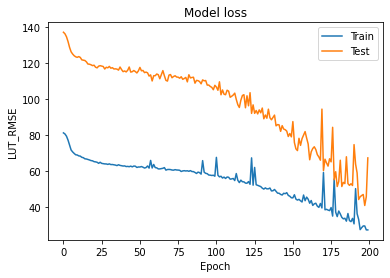

In [237]:
print(np.min(np.sqrt(history.history['loss'])))
print(np.min(np.sqrt(history.history['val_loss'])))
test = np.sqrt(history.history['val_loss'])
print(np.where(test==67.94991836823647))
plt.plot(np.sqrt(history.history['loss'])*0.9)
plt.plot(np.sqrt(history.history['val_loss'])*0.9)
plt.title('Model loss')
plt.ylabel('LUT_RMSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [89]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=1e-3, input_shape=[59]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [41]:
def build_model_3(n_neurons=30, learning_rate=1e-3, input_shape=[59],unit1=1,unit2=2,unit3=3):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    model.add(keras.layers.Dense(unit1, activation="relu"))
    model.add(keras.layers.Dense(unit2, activation="relu"))
    model.add(keras.layers.Dense(unit3, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [42]:
keras.backend.clear_session()
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_3)

<ipython-input-42-0c5b676cc640>:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model_3)


In [43]:
keras_reg

In [45]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
param_distribs = {
    "unit1": np.arange(1,100) .tolist(),
    "unit2": np.arange(1,200) .tolist(),
    "unit3": np.arange(1,100) .tolist(),
    "learning_rate": reciprocal(1e-4, 1e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=1000,
                  validation_data=(X_train_full, y_train_full),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/1000
3/3 [==============================] - 0s 46ms/step - loss: 2581.7661 - val_loss: 8183.1021
Epoch 2/1000
3/3 [==============================] - 0s 35ms/step - loss: 2577.4253 - val_loss: 8177.1968
Epoch 3/1000
3/3 [==============================] - 0s 34ms/step - loss: 2573.2720 - val_loss: 8172.0273
Epoch 4/1000
3/3 [==============================] - 0s 32ms/step - loss: 2569.4792 - val_loss: 8166.8677
Epoch 5/1000
3/3 [==============================] - 0s 31ms/step - loss: 2565.7747 - val_loss: 8161.4795
Epoch 6/1000
3/3 [==============================] - 0s 28ms/step - loss: 2561.6885 - val_loss: 8155.8589
Epoch 7/1000
3/3 [==============================] - 0s 18ms/step - loss: 2557.4260 - val_loss: 8149.7173
Epoch 8/1000
3/3 [==============================] - 0s 20ms/step - loss: 2552.8655 - val_loss: 8143.4854
Epoch 9/1000
3/3 [==============================] - 0s 15ms/step - loss: 2548.2969 - val_loss: 8137

3/3 [==============================] - 0s 13ms/step - loss: 3371.4260 - val_loss: 8091.5815
Epoch 11/1000
3/3 [==============================] - 0s 14ms/step - loss: 3357.9460 - val_loss: 8074.2095
Epoch 12/1000
3/3 [==============================] - 0s 14ms/step - loss: 3341.0583 - val_loss: 8053.0571
Epoch 13/1000
3/3 [==============================] - 0s 15ms/step - loss: 3320.4175 - val_loss: 8027.2256
Epoch 14/1000
3/3 [==============================] - 0s 16ms/step - loss: 3295.3208 - val_loss: 7995.9873
Epoch 15/1000
3/3 [==============================] - 0s 12ms/step - loss: 3264.8184 - val_loss: 7954.6392
Epoch 16/1000
3/3 [==============================] - 0s 13ms/step - loss: 3221.3225 - val_loss: 7893.9067
Epoch 17/1000
3/3 [==============================] - 0s 12ms/step - loss: 3161.3020 - val_loss: 7820.0029
Epoch 18/1000
3/3 [==============================] - 0s 12ms/step - loss: 3082.2107 - val_loss: 7703.4312
Epoch 19/1000
3/3 [==============================] - 0s 12ms

3/3 [==============================] - 0s 17ms/step - loss: 2891.6162 - val_loss: 8130.5288
Epoch 9/1000
3/3 [==============================] - 0s 17ms/step - loss: 2883.5957 - val_loss: 8121.7588
Epoch 10/1000
3/3 [==============================] - 0s 18ms/step - loss: 2875.5044 - val_loss: 8111.8062
Epoch 11/1000
3/3 [==============================] - 0s 15ms/step - loss: 2866.6270 - val_loss: 8101.5327
Epoch 12/1000
3/3 [==============================] - 0s 15ms/step - loss: 2856.7192 - val_loss: 8089.1792
Epoch 13/1000
3/3 [==============================] - 0s 15ms/step - loss: 2845.1831 - val_loss: 8075.0474
Epoch 14/1000
3/3 [==============================] - 0s 14ms/step - loss: 2831.2524 - val_loss: 8057.2646
Epoch 15/1000
3/3 [==============================] - 0s 14ms/step - loss: 2814.6074 - val_loss: 8037.0908
Epoch 16/1000
3/3 [==============================] - 0s 16ms/step - loss: 2794.7395 - val_loss: 8010.8335
Epoch 17/1000
3/3 [==============================] - 0s 13ms/

3/3 [==============================] - 0s 13ms/step - loss: 2509.5410 - val_loss: 7069.8940
Epoch 16/1000
3/3 [==============================] - 0s 14ms/step - loss: 2576.3252 - val_loss: 7127.9756
Epoch 17/1000
3/3 [==============================] - 0s 14ms/step - loss: 2541.5293 - val_loss: 7172.4673
Epoch 18/1000
3/3 [==============================] - 0s 14ms/step - loss: 2517.3962 - val_loss: 7071.3882
Epoch 19/1000
3/3 [==============================] - 0s 16ms/step - loss: 2509.1919 - val_loss: 7071.8979
Epoch 20/1000
3/3 [==============================] - 0s 18ms/step - loss: 2548.0400 - val_loss: 7094.9336
Epoch 21/1000
3/3 [==============================] - 0s 16ms/step - loss: 2533.8735 - val_loss: 7073.4551
Epoch 22/1000
3/3 [==============================] - 0s 18ms/step - loss: 2516.8892 - val_loss: 7086.3091
Epoch 23/1000
3/3 [==============================] - 0s 14ms/step - loss: 2496.0159 - val_loss: 7117.3027
Epoch 24/1000
3/3 [==============================] - 0s 14ms

Epoch 20/1000
3/3 [==============================] - 0s 16ms/step - loss: 1489.8267 - val_loss: 8122.1768
Epoch 21/1000
3/3 [==============================] - 0s 17ms/step - loss: 2529.5503 - val_loss: 8092.7803
Epoch 22/1000
3/3 [==============================] - 0s 19ms/step - loss: 2509.5911 - val_loss: 8067.8105
Epoch 23/1000
3/3 [==============================] - 0s 14ms/step - loss: 2490.8323 - val_loss: 8034.1177
Epoch 24/1000
3/3 [==============================] - 0s 13ms/step - loss: 2465.8696 - val_loss: 7998.1318
Epoch 25/1000
3/3 [==============================] - 0s 14ms/step - loss: 2438.5935 - val_loss: 7953.5791
Epoch 26/1000
3/3 [==============================] - 0s 16ms/step - loss: 2404.7373 - val_loss: 7890.8638
Epoch 27/1000
3/3 [==============================] - 0s 15ms/step - loss: 2356.6006 - val_loss: 7799.9297
Epoch 28/1000
3/3 [==============================] - 0s 17ms/step - loss: 2289.0686 - val_loss: 7639.2158
Epoch 29/1000
2/2 [===========================

3/3 [==============================] - 0s 14ms/step - loss: 461.7090 - val_loss: 5498.7109
Epoch 32/1000
3/3 [==============================] - 0s 13ms/step - loss: 355.3968 - val_loss: 5276.4019
Epoch 33/1000
3/3 [==============================] - 0s 13ms/step - loss: 321.3848 - val_loss: 5398.8159
Epoch 34/1000
3/3 [==============================] - 0s 15ms/step - loss: 320.0441 - val_loss: 5342.1743
Epoch 35/1000
3/3 [==============================] - 0s 16ms/step - loss: 444.7385 - val_loss: 5226.7788
Epoch 36/1000
3/3 [==============================] - 0s 18ms/step - loss: 302.3242 - val_loss: 5311.9058
Epoch 37/1000
3/3 [==============================] - 0s 14ms/step - loss: 283.2774 - val_loss: 5432.1006
Epoch 38/1000
3/3 [==============================] - 0s 18ms/step - loss: 275.5826 - val_loss: 5311.8560
Epoch 39/1000
3/3 [==============================] - 0s 13ms/step - loss: 425.5776 - val_loss: 5291.7417
Epoch 40/1000
3/3 [==============================] - 0s 14ms/step - l

Epoch 4/1000
3/3 [==============================] - 0s 18ms/step - loss: 2906.6470 - val_loss: 8144.5254
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 2895.3860 - val_loss: 8129.8086
Epoch 6/1000
3/3 [==============================] - 0s 15ms/step - loss: 2881.9736 - val_loss: 8114.3882
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 2867.8901 - val_loss: 8096.2354
Epoch 8/1000
3/3 [==============================] - 0s 13ms/step - loss: 2849.9644 - val_loss: 8071.4795
Epoch 9/1000
3/3 [==============================] - 0s 14ms/step - loss: 2828.3538 - val_loss: 8041.6885
Epoch 10/1000
3/3 [==============================] - 0s 15ms/step - loss: 2797.1965 - val_loss: 7997.3984
Epoch 11/1000
3/3 [==============================] - 0s 13ms/step - loss: 2754.2668 - val_loss: 7929.7153
Epoch 12/1000
3/3 [==============================] - 0s 15ms/step - loss: 2683.6621 - val_loss: 7819.5488
Epoch 13/1000
3/3 [==============================] -

Epoch 1/1000
3/3 [==============================] - 0s 43ms/step - loss: 2926.9214 - val_loss: 8153.3921
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 2897.2434 - val_loss: 8108.3545
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 2851.6584 - val_loss: 8021.9487
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 2754.8645 - val_loss: 7801.0527
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 2453.4766 - val_loss: 6767.7891
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 1714.6482 - val_loss: 6104.6982
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 1872.2885 - val_loss: 5953.4551
Epoch 8/1000
3/3 [==============================] - 0s 17ms/step - loss: 1168.4767 - val_loss: 7074.7109
Epoch 9/1000
3/3 [==============================] - 0s 13ms/step - loss: 1706.9001 - val_loss: 7888.7588
Epoch 10/1000
3/3 [==============================] - 0s

Epoch 22/1000
3/3 [==============================] - 0s 15ms/step - loss: 2683.9612 - val_loss: 7877.7100
Epoch 23/1000
3/3 [==============================] - 0s 16ms/step - loss: 2660.3389 - val_loss: 7833.2095
Epoch 24/1000
2/2 [==============================] - 0s 2ms/step - loss: 2684.7227
[CV] END learning_rate=0.0017544161473511712, unit1=19, unit2=34, unit3=82; total time=   1.0s
Epoch 1/1000
3/3 [==============================] - 0s 118ms/step - loss: 2543.2114 - val_loss: 7859.6274
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 39390.7422 - val_loss: 8509.1973
Epoch 3/1000
3/3 [==============================] - 0s 16ms/step - loss: 2670.8982 - val_loss: 7708.1260
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 3341.7983 - val_loss: 572794112.0000
Epoch 5/1000
3/3 [==============================] - 0s 16ms/step - loss: inf - val_loss: nan
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: nan - val_loss: n

3/3 [==============================] - 0s 15ms/step - loss: 2531.1614 - val_loss: 8113.6182
Epoch 21/1000
3/3 [==============================] - 0s 17ms/step - loss: 2527.4331 - val_loss: 8107.4985
Epoch 22/1000
3/3 [==============================] - 0s 15ms/step - loss: 2522.9888 - val_loss: 8101.6870
Epoch 23/1000
3/3 [==============================] - 0s 17ms/step - loss: 2518.7913 - val_loss: 8095.4165
Epoch 24/1000
3/3 [==============================] - 0s 14ms/step - loss: 2514.1028 - val_loss: 8088.5718
Epoch 25/1000
3/3 [==============================] - 0s 16ms/step - loss: 2509.0923 - val_loss: 8081.4111
Epoch 26/1000
3/3 [==============================] - 0s 13ms/step - loss: 2503.8689 - val_loss: 8073.3638
Epoch 27/1000
3/3 [==============================] - 0s 16ms/step - loss: 2498.1365 - val_loss: 8065.1880
Epoch 28/1000
3/3 [==============================] - 0s 12ms/step - loss: 2491.8645 - val_loss: 8054.5000
Epoch 29/1000
3/3 [==============================] - 0s 16ms

3/3 [==============================] - 0s 14ms/step - loss: 376.4108 - val_loss: 5283.5771
Epoch 98/1000
3/3 [==============================] - 0s 14ms/step - loss: 353.5494 - val_loss: 5254.4497
Epoch 99/1000
3/3 [==============================] - 0s 15ms/step - loss: 358.5667 - val_loss: 5309.3755
Epoch 100/1000
3/3 [==============================] - 0s 12ms/step - loss: 378.6680 - val_loss: 5267.7490
Epoch 101/1000
3/3 [==============================] - 0s 14ms/step - loss: 336.2569 - val_loss: 5249.1729
Epoch 102/1000
3/3 [==============================] - 0s 13ms/step - loss: 331.2366 - val_loss: 5211.8740
Epoch 103/1000
3/3 [==============================] - 0s 17ms/step - loss: 327.1549 - val_loss: 5252.9487
Epoch 104/1000
3/3 [==============================] - 0s 16ms/step - loss: 333.3980 - val_loss: 5265.6719
Epoch 105/1000
3/3 [==============================] - 0s 16ms/step - loss: 332.8058 - val_loss: 5301.9224
Epoch 106/1000
3/3 [==============================] - 0s 15ms/s

Epoch 54/1000
3/3 [==============================] - 0s 14ms/step - loss: 1258.1411 - val_loss: 5816.3467
Epoch 55/1000
3/3 [==============================] - 0s 18ms/step - loss: 1210.7994 - val_loss: 5793.8257
Epoch 56/1000
3/3 [==============================] - 0s 13ms/step - loss: 1196.4158 - val_loss: 5773.6948
Epoch 57/1000
3/3 [==============================] - 0s 14ms/step - loss: 1155.0830 - val_loss: 5731.1973
Epoch 58/1000
3/3 [==============================] - 0s 14ms/step - loss: 1131.6066 - val_loss: 5741.6128
Epoch 59/1000
3/3 [==============================] - 0s 15ms/step - loss: 1099.5282 - val_loss: 5708.9292
Epoch 60/1000
3/3 [==============================] - 0s 15ms/step - loss: 1056.9626 - val_loss: 5708.9092
Epoch 61/1000
3/3 [==============================] - 0s 14ms/step - loss: 1029.0555 - val_loss: 5679.9126
Epoch 62/1000
3/3 [==============================] - 0s 13ms/step - loss: 1003.8606 - val_loss: 5637.2510
Epoch 63/1000
3/3 [===========================

3/3 [==============================] - 0s 17ms/step - loss: 2859.2200 - val_loss: 8097.4136
Epoch 22/1000
3/3 [==============================] - 0s 25ms/step - loss: 2853.8684 - val_loss: 8089.7905
Epoch 23/1000
3/3 [==============================] - 0s 25ms/step - loss: 2846.7793 - val_loss: 8081.7490
Epoch 24/1000
3/3 [==============================] - 0s 24ms/step - loss: 2839.3657 - val_loss: 8073.8193
Epoch 25/1000
3/3 [==============================] - 0s 25ms/step - loss: 2832.0659 - val_loss: 8065.5503
Epoch 26/1000
3/3 [==============================] - 0s 18ms/step - loss: 2824.4177 - val_loss: 8055.8423
Epoch 27/1000
3/3 [==============================] - 0s 18ms/step - loss: 2815.5098 - val_loss: 8045.2788
Epoch 28/1000
3/3 [==============================] - 0s 15ms/step - loss: 2805.5334 - val_loss: 8033.5356
Epoch 29/1000
3/3 [==============================] - 0s 16ms/step - loss: 2794.5317 - val_loss: 8020.1479
Epoch 30/1000
3/3 [==============================] - 0s 14ms

3/3 [==============================] - 0s 14ms/step - loss: 337.5673 - val_loss: 5663.0371
Epoch 99/1000
3/3 [==============================] - 0s 13ms/step - loss: 331.4713 - val_loss: 5671.1699
Epoch 100/1000
3/3 [==============================] - 0s 14ms/step - loss: 328.5071 - val_loss: 5623.7539
Epoch 101/1000
3/3 [==============================] - 0s 13ms/step - loss: 334.4139 - val_loss: 5687.2378
Epoch 102/1000
3/3 [==============================] - 0s 14ms/step - loss: 317.1582 - val_loss: 5655.4854
Epoch 103/1000
3/3 [==============================] - 0s 13ms/step - loss: 319.1084 - val_loss: 5668.9976
Epoch 104/1000
2/2 [==============================] - 0s 2ms/step - loss: 1275.3761
[CV] END learning_rate=0.0001074063096070056, unit1=58, unit2=110, unit3=96; total time=   3.6s
Epoch 1/1000
3/3 [==============================] - 0s 42ms/step - loss: 2563.9915 - val_loss: 8093.1855
Epoch 2/1000
3/3 [==============================] - 0s 14ms/step - loss: 2473.5457 - val_loss: 

H:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [-1485.79256185            nan            nan -2422.91764323
 -1448.48498535 -2822.76875814 -2434.40441895            nan
 -1259.6289266             nan]
  warnings.warn(


4/4 [==============================] - 0s 30ms/step - loss: 2984.2981 - val_loss: 8177.5479
Epoch 2/1000
4/4 [==============================] - 0s 11ms/step - loss: 2979.7119 - val_loss: 8172.0571
Epoch 3/1000
4/4 [==============================] - 0s 12ms/step - loss: 2975.3682 - val_loss: 8166.5649
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 2970.7778 - val_loss: 8161.0908
Epoch 5/1000
4/4 [==============================] - 0s 12ms/step - loss: 2966.3057 - val_loss: 8155.4824
Epoch 6/1000
4/4 [==============================] - 0s 12ms/step - loss: 2961.7871 - val_loss: 8149.7041
Epoch 7/1000
4/4 [==============================] - 0s 12ms/step - loss: 2956.9075 - val_loss: 8143.5576
Epoch 8/1000
4/4 [==============================] - 0s 10ms/step - loss: 2951.8645 - val_loss: 8137.0659
Epoch 9/1000
4/4 [==============================] - 0s 11ms/step - loss: 2946.4878 - val_loss: 8130.3203
Epoch 10/1000
4/4 [==============================] - 0s 12ms/step - 

Epoch 79/1000
4/4 [==============================] - 0s 12ms/step - loss: 454.0162 - val_loss: 5113.7886
Epoch 80/1000
4/4 [==============================] - 0s 10ms/step - loss: 469.2382 - val_loss: 5071.1191
Epoch 81/1000
4/4 [==============================] - 0s 9ms/step - loss: 474.4254 - val_loss: 5068.4429
Epoch 82/1000
4/4 [==============================] - 0s 11ms/step - loss: 445.3460 - val_loss: 5113.4019
Epoch 83/1000
4/4 [==============================] - 0s 11ms/step - loss: 428.1314 - val_loss: 5119.1030
Epoch 84/1000
4/4 [==============================] - 0s 10ms/step - loss: 429.0365 - val_loss: 5029.0918
Epoch 85/1000
4/4 [==============================] - 0s 12ms/step - loss: 437.1215 - val_loss: 5086.4722
Epoch 86/1000
4/4 [==============================] - 0s 10ms/step - loss: 405.7032 - val_loss: 5033.1909
Epoch 87/1000
4/4 [==============================] - 0s 11ms/step - loss: 398.0746 - val_loss: 5075.7827
Epoch 88/1000
4/4 [==============================] - 0s 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x00000201E46E9D00>,
                   param_distributions={'learning_rate': [0.00037896177388938045,
                                                          0.00023654624838037315,
                                                          0.0003371662054603376,
                                                          0.008393083024295716,
                                                          0.005745644407776698,
                                                          0.0035904250477495985,
                                                          0.009970850890059911,
                                                          0.009743539091207155,
                                                          0.00862676151178373,
                                                          0.00312444976...
                                                          0.00022966079

In [198]:
rnd_search_cv.best_params_

{'unit3': 96,
 'unit2': 110,
 'unit1': 58,
 'learning_rate': 0.0001074063096070056}

In [65]:
rnd_search_cv.best_score_

-1259.628926595052

In [57]:
model = rnd_search_cv.best_estimator_.model

In [253]:
rnd_search_cv.cv_results_

{'mean_fit_time': array([2.67152643, 0.83137592, 0.67554935, 1.0168612 , 1.88896688,
        0.93499676, 0.95517135, 0.89790305, 4.03810056, 0.73698211]),
 'std_fit_time': array([0.24922057, 0.22285616, 0.00262379, 0.20635229, 0.27842626,
        0.08923131, 0.15205728, 0.19930532, 0.3017871 , 0.07791618]),
 'mean_score_time': array([0.03591792, 0.03573887, 0.03590393, 0.08131941, 0.03590337,
        0.0375673 , 0.03690163, 0.0362556 , 0.03523986, 0.03596894]),
 'std_score_time': array([0.00081493, 0.00019216, 0.0014104 , 0.06186961, 0.00082576,
        0.00094044, 0.00141063, 0.00045687, 0.0012446 , 0.00072309]),
 'param_unit3': masked_array(data=[75, 89, 49, 73, 85, 28, 82, 44, 96, 73],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_unit2': masked_array(data=[107, 64, 62, 126, 106, 145, 34, 89, 110, 18],
              mask=[False, False, False, False, False, Fal

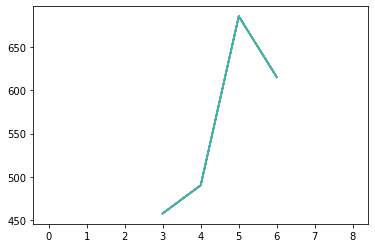

In [252]:
for i in rnd_search_cv.cv_results_["param_learning_rate"]:
    plt.plot(rnd_search_cv.cv_results_[""],rnd_search_cv.cv_results_["std_test_score"])


In [241]:
deep_predict = model.predict(X_valid)

In [242]:
from sklearn.metrics import r2_score
r2_score(y_valid,deep_predict)

0.7341936435864161

In [106]:
X_valid_backup

NameError: name 'X_valid_backup' is not defined

In [107]:
y_valid

200     36
142     15
151      0
114     72
81       1
43       0
58     102
175      1
71      19
166     20
130      1
13       1
87       0
208     38
117      3
122     71
99       4
50      20
26      22
11      47
74     229
141     90
204      2
77       2
149     21
192      1
63       1
12       4
65       4
51       4
133      1
2      100
91       1
191     38
1       74
112      9
24       1
46     948
3        8
179      0
59      34
164     32
203     11
Name: LUT, dtype: int64

In [108]:
y_train_full

127      1
108     68
69      14
84       0
97     123
      ... 
106      0
14     170
92       1
179      0
102     44
Name: LUT, Length: 169, dtype: int64

5/5 [==============================] - 0s 2ms/step - loss: 119.4804


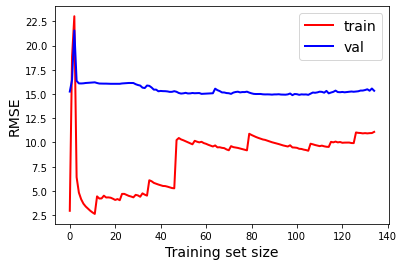

In [44]:
plot_learning_curves(model, X_train_full, y_train_full)
#plt.axis([0, 200, 0, 200])                         # not shown in the book
plt.show() 

In [163]:
predict = model.predict(X_valid)
predict

array([[ 31.302113 ],
       [ 13.202502 ],
       [  1.4642506],
       [ 17.41863  ],
       [  1.4345452],
       [ 15.217053 ],
       [105.78109  ],
       [  6.984596 ],
       [ 22.208517 ],
       [ 24.478987 ],
       [ 10.146852 ],
       [  2.697756 ],
       [ 26.683569 ],
       [ 40.61043  ],
       [  2.24936  ],
       [ 10.2791815],
       [  3.617224 ],
       [  7.230478 ],
       [ 26.78847  ],
       [ 40.987774 ],
       [233.39195  ],
       [ 73.843506 ],
       [ 25.366823 ],
       [  1.3949833],
       [ 13.382822 ],
       [  2.8901322],
       [  1.9197996],
       [  2.89565  ],
       [ 24.560827 ],
       [  5.523542 ],
       [  5.0518036],
       [ 95.76241  ],
       [  2.3377774],
       [ 38.192425 ],
       [ 60.7633   ],
       [  5.6340957],
       [  2.9980829],
       [950.7049   ],
       [  9.212509 ],
       [  2.8258276],
       [ 33.661537 ],
       [ 32.743523 ],
       [ 18.795252 ]], dtype=float32)

In [164]:
y_valid

200     36
142     15
151      0
114     72
81       1
43       0
58     102
175      1
71      19
166     20
130      1
13       1
87       0
208     38
117      3
122     71
99       4
50      20
26      22
11      47
74     229
141     90
204      2
77       2
149     21
192      1
63       1
12       4
65       4
51       4
133      1
2      100
91       1
191     38
1       74
112      9
24       1
46     948
3        8
179      0
59      34
164     32
203     11
Name: LUT, dtype: int64

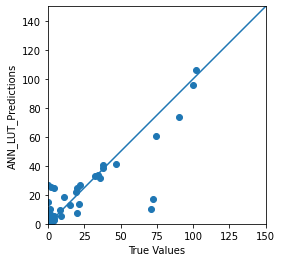

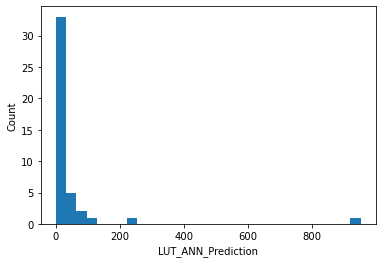

In [248]:
plt.figure(1)
plt.clf()
ax=plt.axes(aspect='equal')
plt.scatter(y_valid,predict)
plt.xlabel('True Values')
plt.ylabel('ANN_LUT_Predictions')
Lims=[0,150]
plt.xlim(Lims)
plt.ylim(Lims)
plt.plot(Lims,Lims)
plt.grid(False)
    
plt.figure(2)
plt.clf()
plt.hist(predict,bins=30)
plt.xlabel('LUT_ANN_Prediction')
plt.ylabel('Count')
plt.grid(False)
